# Bank Note Authentication 

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#reading the banknote dataset in a dataframe. 
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [29]:
df

,var,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values


In [33]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [34]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

#backedend working of the PCA algo

In [42]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00091241  0.26106526 -0.37965807  0.2855868 ]
 [ 0.26106526  1.00091241 -0.78600078 -0.52370267]
 [-0.37965807 -0.78600078  1.00091241  0.32384024]
 [ 0.2855868  -0.52370267  0.32384024  1.00091241]]


In [43]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.24410388 -0.75674709  0.60295351  0.06476264]
 [-0.63914113  0.0457533  -0.11988157 -0.75830974]
 [ 0.61378454  0.15345344  0.50421613 -0.58778114]
 [ 0.3939295  -0.63379217 -0.60649943 -0.27438198]]

Eigenvalues 
[2.17821749 1.30130064 0.34425337 0.17987814]


#Actual PCA algo


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train_sd)

PCA(n_components=4)

In [36]:
print(pca.components_)

[[-0.24410388 -0.63914113  0.61378454  0.3939295 ]
 [-0.75674709  0.0457533   0.15345344 -0.63379217]
 [ 0.60295351 -0.11988157  0.50421613 -0.60649943]
 [-0.06476264  0.75830974  0.58778114  0.27438198]]


In [37]:
print(pca.explained_variance_)

[2.17821749 1.30130064 0.34425337 0.17987814]


In [38]:
print(pca.explained_variance_ratio_)

[0.54405797 0.3250286  0.08598489 0.04492854]


In [39]:
X_train_sd

array([[ 0.43276611,  0.17683944,  0.35255601,  0.62396568],
       [ 1.01617664,  1.36215997, -1.21677437, -1.20376071],
       [ 0.16155857,  1.29846413, -0.47980069, -0.22838503],
       ...,
       [ 0.72584187,  0.97107711, -0.42301797, -0.694443  ],
       [-0.04710153,  0.2458662 , -1.37713061, -1.34654176],
       [-0.6594858 , -0.68893568, -0.34943891,  0.47932997]])

In [40]:
X_train_sd_pca = pca.transform(X_train_sd)
X_train_sd_pca

array([[ 0.24352667, -0.66076714,  0.03906765,  0.48450271],
       [-2.33969928, -0.13044949,  0.56597232, -0.07835838],
       [-1.25380075,  0.00827162, -0.16165747,  0.6294925 ],
       ...,
       [-1.33103962, -0.12962976,  0.52912146,  0.25018517],
       [-1.52134953,  0.68899534,  0.06443048, -0.98942503],
       [ 0.57565219,  0.1101247 , -0.78195468, -0.55359069]])

In [41]:
(-0.24410388*X_train_sd[:,0])+(-0.63914113*X_train_sd[:,1])+(0.61378454*X_train_sd[:,2])+(0.3939295*X_train_sd[:,3])

array([ 0.24352667, -2.33969928, -1.25380075, ..., -1.33103962,
       -1.52134954,  0.57565219])

In [44]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.40579687  86.90865691  95.50714586 100.        ]


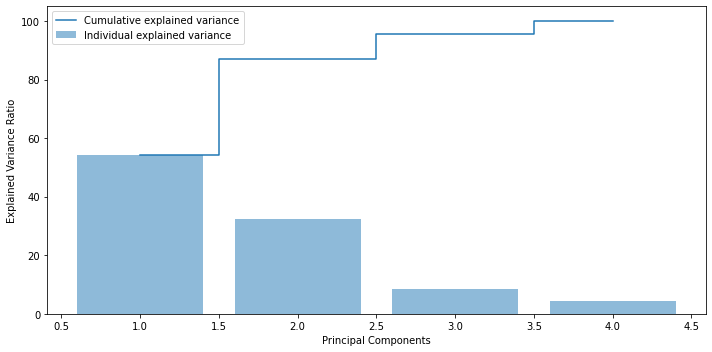

In [45]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [46]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.1782174876819473,
  array([-0.24410388, -0.63914113,  0.61378454,  0.3939295 ])),
 (1.3013006373731928,
  array([-0.75674709,  0.0457533 ,  0.15345344, -0.63379217])),
 (0.34425337148288965,
  array([ 0.60295351, -0.11988157,  0.50421613, -0.60649943])),
 (0.1798781384984641,
  array([ 0.06476264, -0.75830974, -0.58778114, -0.27438198]))]

In [47]:
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
w

array([[-0.24410388, -0.75674709],
       [-0.63914113,  0.0457533 ],
       [ 0.61378454,  0.15345344],
       [ 0.3939295 , -0.63379217]])

In [48]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[-0.24410388 -0.75674709]
 [-0.63914113  0.0457533 ]
 [ 0.61378454  0.15345344]
 [ 0.3939295  -0.63379217]]


In [49]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((1097, 4), (4, 2), (1097, 2), (275, 2))

### We will use Logistic regression, RandomForest and AdaBoost

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))


Before PCA score 0.9927272727272727
After PCA score 0.7709090909090909


In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))


Before PCA score 0.9890909090909091
After PCA score 0.8581818181818182


### In the given dataset we trained models with the orginal and dimensionally reduced datsets. The effects of PCA can be clearly appreciated on a fairly large datsaset. The learners are encouraged to try the above with various large datsets out there.

## Reference Link 
* https://www.analyticsvidhya.com/blog/2020/12/an-end-to-end-comprehensive-guide-for-pca/